# Kerala Floods 2018 — Exploratory Data Analysis (EDA)

In this notebook, we load the Kerala Floods 2018 dataset, perform basic exploration, 
and check the structure, summary statistics, and missing values.
This will help us understand the dataset before building any ML models.


## Step 1: Import libraries and load dataset

We use pandas to load the dataset into a DataFrame.
A DataFrame is like an Excel sheet in Python — it stores rows and columns of data.

Here we load our dataset from the `data/` folder and display the first 5 rows 
to quickly check what the data looks like.


In [8]:
import pandas as pd 
#loading dataset
df = pd.read_csv("../data/kerala_floods_2018.csv")
df.head() #shwoi

,district,fatalities,no_of_camps,actual_rainfall_in_mm,normal_rainfall_in_mm,no_of_landslides,full_damaged_houses
0,Thiruvananthapuram,11,94,373.8,142.0,0,111
1,Kollam,5,168,644.1,258.7,2,95
2,Pathanamthitta,3,4352,764.9,352.7,8,741
3,Alappuzha,43,2126,608.2,343.1,0,2075
4,Kottayam,14,788,619.2,386.0,29,76


## Step 2: Check dataset structure (df.info)

The `.info()` method shows:
- Column names
- Data types (int, float, object/string)
- Number of non-null (filled) values per column

This helps us understand what type of data each column holds, and whether 
there are missing values.


In [9]:
# Check structure: columns, datatypes, non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district               14 non-null     object 
 1   fatalities             14 non-null     int64  
 2   no_of_camps            14 non-null     int64  
 3   actual_rainfall_in_mm  14 non-null     float64
 4   normal_rainfall_in_mm  14 non-null     float64
 5   no_of_landslides       14 non-null     int64  
 6   full_damaged_houses    14 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 916.0+ bytes


## Step 3: Get summary statistics (df.describe)

The `.describe()` method gives summary stats for numeric columns:
- Count (number of rows)
- Mean (average)
- Standard deviation (spread of values)
- Min, Max
- Quartiles (25%, 50%, 75%)

This is useful to see ranges (e.g., rainfall min vs max) and spot any anomalies.


In [10]:
df.describe()

,fatalities,no_of_camps,actual_rainfall_in_mm,normal_rainfall_in_mm,no_of_landslides,full_damaged_houses
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,24.214286,875.214286,773.307143,417.950000,23.642857,737.071429
std,23.344176,1201.089709,260.248297,133.874509,37.300458,849.385159
min,1.000000,2.000000,373.800000,142.000000,0.000000,3.000000
25%,6.000000,165.750000,638.700000,345.500000,0.500000,108.000000
50%,15.000000,381.000000,700.000000,398.300000,13.000000,557.500000
75%,39.750000,1331.750000,845.600000,520.700000,28.250000,1023.750000
max,72.000000,4352.000000,1478.900000,636.300000,143.000000,2889.000000


## Step 4: Check for missing values

The `.isnull().sum()` method counts how many missing (NaN) values are in each column.

Sorting in descending order lets us see the columns with the most missing data first.
This step is crucial because missing values must be handled before ML modeling.


In [11]:
df.isnull().sum().sort_values(ascending=False)

district                 0
fatalities               0
no_of_camps              0
actual_rainfall_in_mm    0
normal_rainfall_in_mm    0
no_of_landslides         0
full_damaged_houses      0
dtype: int64

## Step 5: Quick visual exploration

We’ll visualize key relationships to understand the data before modeling:

1) Bar chart — **actual rainfall (mm) per district**  
2) Bar chart — **fatalities per district**  
3) Box plot — **distribution of actual rainfall** (outliers)  
4) Scatter — **rainfall vs fatalities** (is higher rain linked to higher deaths?)

These visuals guide feature choices for our MVP model.


In [12]:
#if any error happens, we can check the exact column where there is an error using this
df.columns.tolist()

['district',
 'fatalities',
 'no_of_camps',
 'actual_rainfall_in_mm',
 'normal_rainfall_in_mm',
 'no_of_landslides',
 'full_damaged_houses']

### 5.1 Actual rainfall (mm) per district

Bar chart to compare rainfall intensity across districts.  
Rotate x-labels so district names don’t overlap.


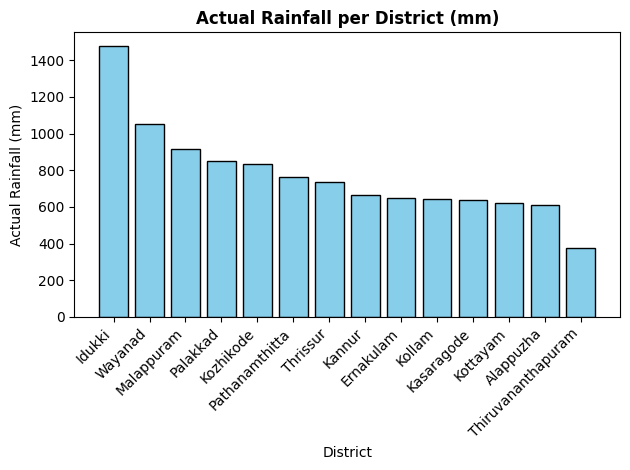

In [33]:
import matplotlib.pyplot as plt
#sorting by rainfall so the bars are easier to read
plot_df = df.sort_values("actual_rainfall_in_mm",ascending=False)
plt.bar(plot_df["district"],plot_df["actual_rainfall_in_mm"],color="skyblue",edgecolor="black")
plt.title("Actual Rainfall per District (mm)",fontweight="bold")
plt.xlabel("District")
plt.ylabel("Actual Rainfall (mm)")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

### 5.2 Fatalities per district

Bar chart to see which districts suffered most fatalities.


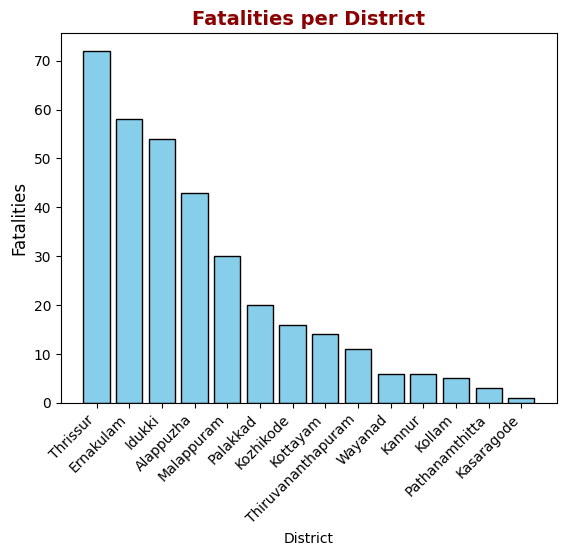

In [32]:
plot_df=df.sort_values("fatalities",ascending=False)
plt.bar(plot_df["district"], plot_df["fatalities"], color="skyblue", edgecolor="black")
plt.title("Fatalities per District", fontweight="bold", fontsize=14, color="darkred")
plt.ylabel("Fatalities", fontsize=12)

plt.xlabel("District")
plt.xticks(rotation = 45,ha="right")
plt.show()

### 5.3 Box plot — actual rainfall

Box plot shows median (Q2), quartiles (Q1/Q3), IQR, and **outliers** (points beyond whiskers).
This helps spot extreme rainfall values that likely drove flooding.


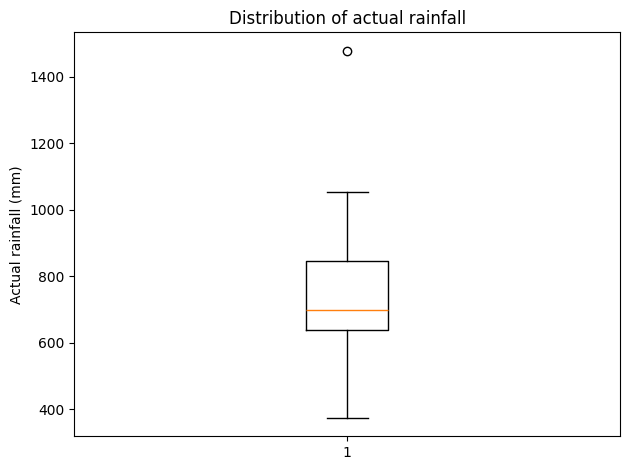

In [37]:
plt.boxplot(df["actual_rainfall_in_mm"],vert=True)
plt.title("Distribution of actual rainfall")
plt.ylabel("Actual rainfall (mm)")
plt.tight_layout()
plt.show()

### 5.4 Scatter plot — Rainfall vs Fatalities

This scatter plot helps check if higher rainfall intensity is linked to higher fatalities.  
Each point = one district (X = rainfall, Y = fatalities).


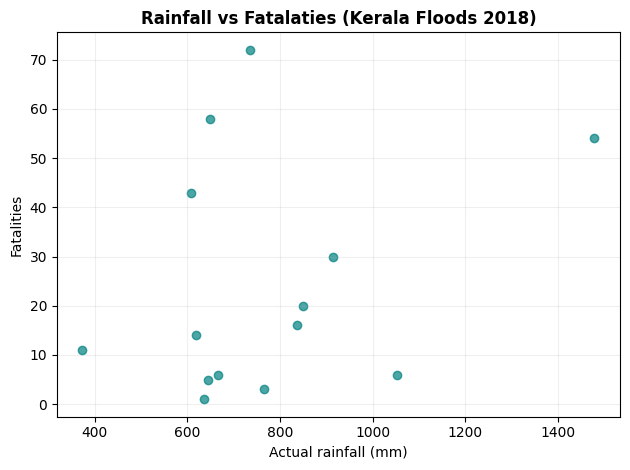

In [44]:
plt.scatter(df["actual_rainfall_in_mm"],df["fatalities"],color="teal",alpha=0.7)
plt.title("Rainfall vs Fatalaties (Kerala Floods 2018)",fontweight="bold")
plt.xlabel("Actual rainfall (mm)")
plt.ylabel("Fatalities")
plt.grid(True,linestyle="-",alpha=0.2)
plt.tight_layout()
plt.show()
